In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [42]:
df = pd.read_csv('data.csv')
df

,location,bedrooms,bath,size,price
0,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1750,9500000
1,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1615,9500000
2,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1615,9500000
3,"Sector5,Uttara,Dhaka",2.0,2.0,807,5200000
4,"BlockG,BashundharaR-A,Dhaka",4.0,4.0,3100,40000000
...,...,...,...,...,...
8715,"MiddlePaikpara,Mirpur,Dhaka",3.0,2.0,1025,4000000
8716,"Sector13,Uttara,Dhaka",4.0,4.0,3000,32500000
8717,"BlockF,BashundharaR-A,Dhaka",3.0,4.0,1695,13500000
8718,"Section12,Mirpur,Dhaka",3.0,3.0,1150,4500000


In [3]:
df2 = df.drop_duplicates()

In [4]:
df3 = df2.dropna()

In [5]:
df3.shape

(5613, 5)

In [6]:
df3['location'] = df3['location'].str.lower()
df3['location'] = df3['location'].str.split(',',n=0,expand=True)

<ipython-input-6-7efacdcf69b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].str.lower()
<ipython-input-6-7efacdcf69b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].str.split(',',n=0,expand=True)


In [7]:
df3

,location,bedrooms,bath,size,price
0,motijheelextension,3.0,2.0,1750,9500000
1,motijheelextension,3.0,2.0,1615,9500000
3,sector5,2.0,2.0,807,5200000
4,blockg,4.0,4.0,3100,40000000
5,eastmaniknagar,3.0,3.0,1300,6600000
...,...,...,...,...,...
8715,middlepaikpara,3.0,2.0,1025,4000000
8716,sector13,4.0,4.0,3000,32500000
8717,blockf,3.0,4.0,1695,13500000
8718,section12,3.0,3.0,1150,4500000


In [8]:
df4 = df3.copy()

In [9]:
df4.shape

(5613, 5)

In [10]:
df5 = df4[df4['bedrooms']<20]

In [11]:
df5.shape

(5587, 5)

In [12]:
df6 = df5[df5['bath']<20]

In [13]:
df7 = df6[df6['size']<3500]

In [14]:
df8 = df7[df7['size']>300]

In [15]:
df9 = df8[df8['price']<30000000]

In [16]:
df9.shape

(5245, 5)

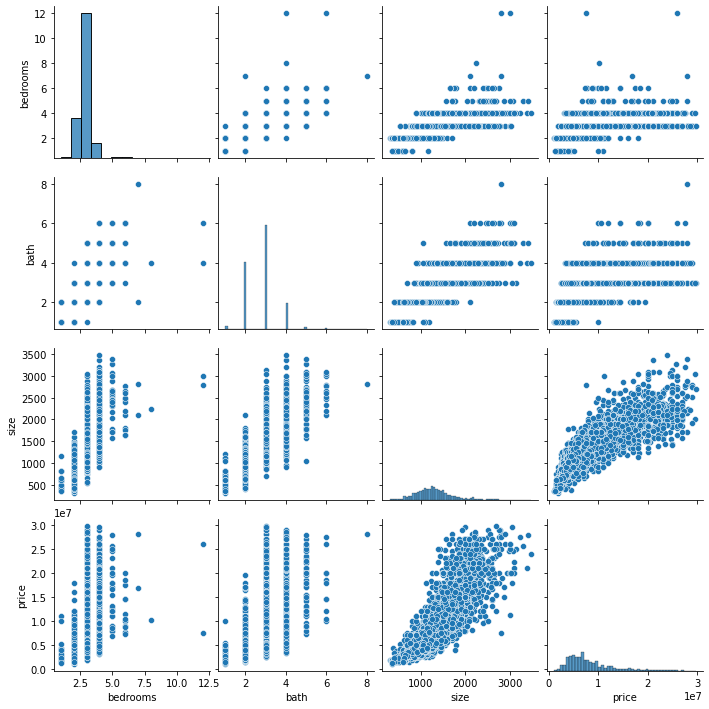

In [17]:
sns.pairplot(df9)

In [18]:
location_stats = df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head()

location
sector10     178
pallabi      140
ashkona      102
section12    101
blockf        97
Name: location, dtype: int64

In [19]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
dakhshinpara      10
2ndcolony         10
shantibag         10
westnakhalpara    10
atibazar          10
Name: location, dtype: int64

In [20]:
df9.location=df9.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df9.location.unique())

C:\Users\fahim\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


116

In [21]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,ahmednagar,ashkona,baitulamanhousingsociety,bankcolony,banktown,bashabomadartekroad,blocka,blockb,blockc,blockd,...,tajmahalroad,taltola,tejkunipara,uttarbadda,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westrampura,westshewrapara
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')

In [23]:
df10 = df10.drop('location',axis='columns')

In [24]:
X = df10.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bath,size,ahmednagar,ashkona,baitulamanhousingsociety,bankcolony,banktown,bashabomadartekroad,blocka,...,tajmahalroad,taltola,tejkunipara,uttarbadda,wari,westagargaon,westdhanmondiandshangkar,westkazipara,westrampura,westshewrapara
0,3.0,2.0,1750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,1615,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,807,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y = df10.price
y.head(3)

0    9500000
1    9500000
3    5200000
Name: price, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7817663207789085

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76964946, 0.78167897, 0.75893035, 0.78794934, 0.78998084])

In [29]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.777638,{'normalize': True}
1,lasso,0.777640,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.596896,"{'criterion': 'mse', 'splitter': 'best'}"


In [30]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [31]:
predict_price('sector10',1500, 2, 4)

-1687872380.9166224

In [35]:
abs(predict_price('sector10',1000, 2, 2))/100

11258883.701031115

In [36]:
abs(predict_price('sector10',2000, 4, 4))/100

22491653.913411044

In [38]:
abs(predict_price('sector5',2000, 4, 4))/100

22471129.888000228

In [41]:
abs(predict_price('southmonipur',2000, 4, 4))/100

22503774.022382922

In [40]:
df9['location'].unique()

array(['other', 'sector5', 'bochila', 'eastrampura', 'pirerbag',
       'southmonipur', 'blockj', 'khilbaritek', 'nobodoyhousingsociety',
       'merulbadda', 'blocke', 'southbanasreeproject', 'kallyanpur',
       'roadno2', 'blocka', 'uttarbadda', 'middlemonipur', 'blockh',
       'malibagbazarrd', 'northadabor', 'section2', 'eastkazipara',
       'blockd', 'blockg', 'rayerbazaar', 'eastmonipur',
       'baitulamanhousingsociety', 'sector3', 'roadno3',
       'pcculturehousing', 'northbashabo', 'roadno4', 'section10',
       'blockf', 'section1', 'ashkona', 'goran', 'monipuripara', 'blockc',
       'meradia', 'greenroad', 'southbashabo', 'southkeraniganj',
       'shahjadpur', 'ahmednagar', 'kadamtala', 'section6', 'southbadda',
       'middlebadda', 'matikata', 'westdhanmondiandshangkar', 'sector6',
       'pallabi', 'sector10', 'shiddheswarilane', 'blockb', 'section11',
       'sector7', 'sector13', 'blocki', 'elephantroad', 'nayatola',
       'mirpurdohs', 'middlepaikpara', 'eastsh